In [2]:
import numpy as np
from numpy import array, exp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math


In [3]:
df = pd.read_csv("../raw_data/SensorSuiteData.csv")
df2 = pd.read_csv("../raw_data/Arduino_Data.csv")

In [4]:
sensorSuiteData = pd.DataFrame(df)
arduinoData = pd.DataFrame(df2)

In [5]:
inHeatPad = arduinoData["Inner Heating pad (Arduino)"]
bottom = sensorSuiteData["Bottom"]
outHeatPad = sensorSuiteData["Direct Heating Pad"]
top = sensorSuiteData["Top"]

In [6]:
inHeatPadArray = np.asarray(inHeatPad)
bottomArray = np.asarray(bottom)
outHeatPadArray = np.asarray(outHeatPad)
topArray = np.asarray(top)

In [7]:
avgInHeatPad = inHeatPad.rolling(1000, min_periods=100).mean().dropna()
avgBottom = bottom.rolling(1000, min_periods=100).mean().dropna()
avgOutHeatPad = outHeatPad.rolling(10000, min_periods= 100).mean().dropna()
avgTop = top.rolling(1000, min_periods=100).mean().dropna()

<Axes: >

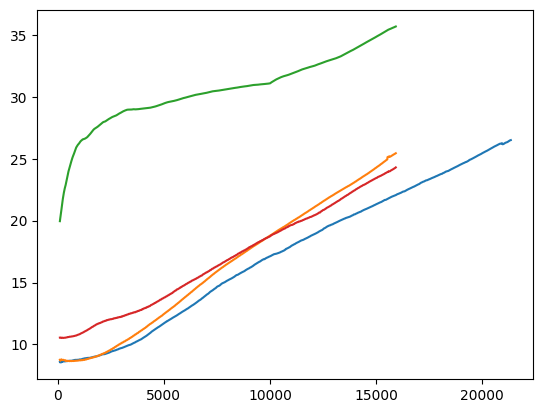

In [8]:
avgInHeatPad.plot()
avgBottom.plot()
avgOutHeatPad.plot()
avgTop.plot()

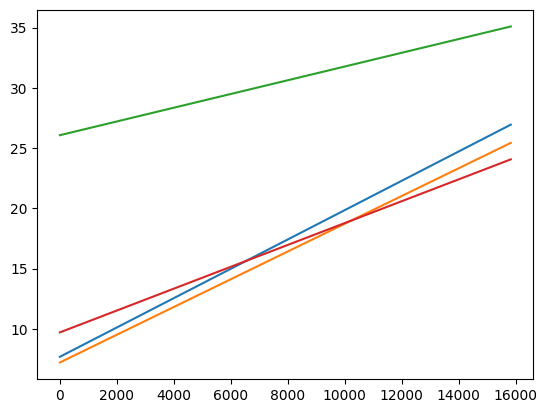

In [33]:
def linearModel(x, a, b):
    return a*x + b

x = array(range(len(avgInHeatPad)))
inHeatPadParams, covs = curve_fit(linearModel, x, avgInHeatPad)
x = array(range(len(avgBottom)))
bottomParams, covs = curve_fit(linearModel, x, avgBottom)
x = array(range(len(avgOutHeatPad)))
outHeatPadParams, covs = curve_fit(linearModel, x, avgOutHeatPad)
x = array(range(len(avgTop)))
topParams, covs = curve_fit(linearModel, x, avgTop)

inHeatPadParams[0] = (len(avgInHeatPad)/len(avgTop))*inHeatPadParams[0]

inHeatPadFunction = inHeatPadParams[0]*x + inHeatPadParams[1]
bottomFunction = bottomParams[0]*x + bottomParams[1]
outHeatPadFunction = outHeatPadParams[0]*x + outHeatPadParams[1]
topFunction = topParams[0]*x + topParams[1]

plt.plot(x, inHeatPadFunction)
plt.plot(x, bottomFunction)
plt.plot(x, outHeatPadFunction)
plt.plot(x, topFunction)

<Axes: >

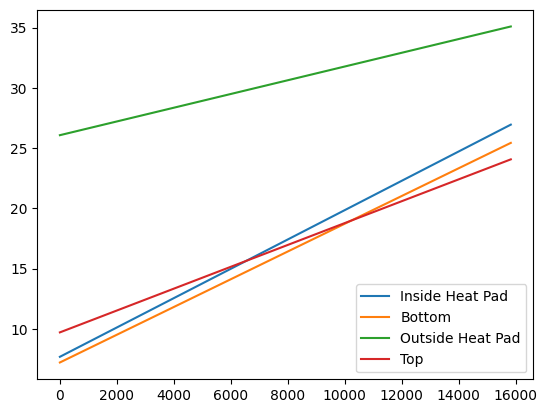

In [40]:
data = [inHeatPadFunction, bottomFunction, outHeatPadFunction, topFunction]
finalData = pd.DataFrame(data).transpose()
finalData.columns = ["Inside Heat Pad", "Bottom", "Outside Heat Pad", "Top"]

finalData.to_csv("")
finalData.plot()